<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов.-(Random-Forest)" data-toc-modified-id="Взвешивание-классов.-(Random-Forest)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов. (Random Forest)</a></span></li><li><span><a href="#Взвешивание-классов-(Logistic-Regression)" data-toc-modified-id="Взвешивание-классов-(Logistic-Regression)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Взвешивание классов (Logistic Regression)</a></span></li><li><span><a href="#Взвешивание-классов-(Decision-Tree)" data-toc-modified-id="Взвешивание-классов-(Decision-Tree)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Взвешивание классов (Decision Tree)</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Увеличение-выборки-(Random-Forest)" data-toc-modified-id="Увеличение-выборки-(Random-Forest)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Увеличение выборки (Random Forest)</a></span></li><li><span><a href="#Увеличение-выборки-(Logistic-Regression)" data-toc-modified-id="Увеличение-выборки-(Logistic-Regression)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Увеличение выборки (Logistic Regression)</a></span></li><li><span><a href="#Увеличение-выборки-(Decision-Tree)" data-toc-modified-id="Увеличение-выборки-(Decision-Tree)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Увеличение выборки (Decision Tree)</a></span></li><li><span><a href="#Уменьшение-выборки-(Random-Forest)" data-toc-modified-id="Уменьшение-выборки-(Random-Forest)-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Уменьшение выборки (Random Forest)</a></span></li><li><span><a href="#Уменьшение-выборки-(Logistic-Regression)" data-toc-modified-id="Уменьшение-выборки-(Logistic-Regression)-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Уменьшение выборки (Logistic Regression)</a></span></li><li><span><a href="#Уменьшение-выборки-(Decision-Tree)" data-toc-modified-id="Уменьшение-выборки-(Decision-Tree)-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Уменьшение выборки (Decision Tree)</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

In [1]:
!pip install scikit-learn==1.1.3

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import (
    f1_score, accuracy_score, recall_score, precision_score,
    precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## Подготовка данных

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

In [4]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [6]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
display(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [10]:
target = df['Exited']
features = df.drop(['Exited'], axis=1)

In [11]:
X_train, X_s, y_train, y_s = train_test_split(features, target, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_s, y_s, test_size=0.5, random_state=7)

In [12]:
X_train.shape

(6000, 10)

In [13]:
X_valid.shape

(2000, 10)

In [14]:
X_test.shape

(2000, 10)

In [15]:
y_train.shape

(6000,)

In [16]:
y_valid.shape

(2000,)

In [17]:
y_test.shape

(2000,)

In [18]:
num=['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
scaler = StandardScaler()
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])
X_valid[num] = scaler.transform(X_valid[num])
X_test[num] = scaler.transform(X_test[num])

In [19]:
name = ['Geography', 'Gender']
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(X_train[name])

X_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(X_train[name])
X_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(X_valid[name])
X_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(X_test[name])

X_train = X_train.drop(name, axis=1)
X_valid = X_valid.drop(name, axis=1)
X_test = X_test.drop(name, axis=1)


In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8050,0.584215,-0.562414,-1.089514,-1.242622,2,0,0,0.532607,0.0,0.0,1.0
1265,-1.217221,1.533243,-0.009659,0.633982,3,1,0,0.380518,0.0,0.0,0.0
961,0.355131,-0.371900,-0.009659,0.970488,1,1,0,0.234886,0.0,1.0,1.0
2510,-0.269644,1.247471,-1.089514,0.032300,1,1,1,-0.266872,0.0,0.0,0.0
8628,0.552977,0.485414,-0.729562,-1.242622,2,0,1,0.913119,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
919,-1.029788,0.580671,1.430149,-1.242622,2,1,0,-1.266692,0.0,1.0,1.0
4307,1.240230,0.675929,1.430149,1.816428,1,1,1,-1.474546,0.0,1.0,1.0
5699,0.344718,-0.371900,0.350293,0.937167,1,1,1,-0.221707,0.0,0.0,1.0
537,0.365544,-0.467157,1.430149,-1.242622,2,1,0,0.475626,0.0,1.0,1.0


In [21]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

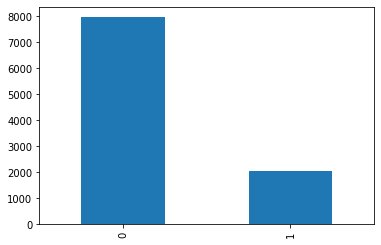

In [22]:
df['Exited'].value_counts().plot(kind='bar');

### Вывод:
1. **Загрузили и изучили данные:**
   * Заметили пропуски в столбце `Tenure`, заменили на медиану.
   * Удалили столбцы `RowNumber`, `CustomerId`, `Surname`, т.к. они не дают никакой информации для нашего исследования.
   * Методом OHE преобразовали столбцы `Geography`, `Gender`.
   * Стандартизировали столбцы `CreditScore`, `Age`, `Balance`, `EstimatedSalary`, `Tenure`.  
2. **После изучения данных сформировали три выборки для проведения исследований.**
   * X_train, y_train - Обучающаяя выборка (60%)
   * X_valoid, y_valid - Валидационная выборка (20%)
   * X_test, y_test - Тестовая выборка (20%)
3. **Так же изучили дисбаланс классов**
   * 0 - 7963  
     1 - 2037  
     Соотношение 4:1 (запомним для борьбы с дисбалансом)

## Исследование задачи

Строим модели не избавившись от дисбаланса.   
Используем три модели:
1. Случайный лес.
2. Логистическая регрессия. 
3. Дерево решений. 

### Random Forest

In [23]:
F1_best = 0
for depth in range(1, 51):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=7)
        model.fit(X_train, y_train)
        z_valid = model.predict(X_valid)
        f1 = f1_score(y_valid, z_valid)
        if f1 > F1_best:
            best_depth = depth
            best_est = est
            F1_best = f1
                
print('Случайные лес, лучшие показатели:')
print('Число деревьев:', est)
print('Глубина древа:', depth)

Случайные лес, лучшие показатели:
Число деревьев: 91
Глубина древа: 50


In [24]:
model_random = RandomForestClassifier(n_estimators = 91, max_depth = 50, random_state=7)
model_random.fit(X_train, y_train)
z_valid_random = model_random.predict(X_valid)
print("Accuracy_random:", accuracy_score(y_valid, z_valid_random))
print("Recall_random:", recall_score(y_valid, z_valid_random))
print("Precision_random:", precision_score(y_valid, z_valid_random))
print("F1_random:", f1_score(y_valid, z_valid_random))

Accuracy_random: 0.8655
Recall_random: 0.4609571788413098
Precision_random: 0.7689075630252101
F1_random: 0.5763779527559055


In [25]:
display(confusion_matrix(y_valid, z_valid_random))

array([[1548,   55],
       [ 214,  183]])

### Logistic Regression

In [26]:
model_log = LogisticRegression(random_state = 7, solver = 'liblinear')
model_log.fit(X_train, y_train)
z_valid_log = model_log.predict(X_valid)
print("Accuracy_log:", accuracy_score(y_valid, z_valid_log))
print("Recall_log:", recall_score(y_valid, z_valid_log))
print("Precision_log:", precision_score(y_valid, z_valid_log))
print("F1_log:", f1_score(y_valid, z_valid_log))

Accuracy_log: 0.814
Recall_log: 0.20906801007556675
Precision_log: 0.5886524822695035
F1_log: 0.30855018587360594


In [27]:
display(confusion_matrix(y_valid, z_valid_log))

array([[1545,   58],
       [ 314,   83]])

### Decision Tree

In [28]:
F1_best = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 7)
    model.fit(X_train, y_train)
    z_valid = model.predict(X_valid)
    f1 = f1_score(y_valid, z_valid)
    if f1 > F1_best:
        model_dec = model
        best_depth = depth
        F1_best = f1

print('Древо решений, лучшие показатели:')
print('Глубина древа:', depth)

Древо решений, лучшие показатели:
Глубина древа: 50


In [29]:
model_dec =  DecisionTreeClassifier(max_depth = 50, random_state = 7)
model_dec.fit(X_train, y_train)
z_valid_dec = model_dec.predict(X_valid)
print("Accuracy_dec:", accuracy_score(y_valid, z_valid_dec))
print("Recall_dec:", recall_score(y_valid, z_valid_dec))
print("Precision_dec:", precision_score(y_valid, z_valid_dec))
print("F1_dec:", f1_score(y_valid, z_valid_dec))

Accuracy_dec: 0.792
Recall_dec: 0.5289672544080605
Precision_dec: 0.4783599088838269
F1_dec: 0.5023923444976077


In [30]:
display(confusion_matrix(y_valid, z_valid_dec))

array([[1374,  229],
       [ 187,  210]])

### Вывод: 
Лучший показатель F1 Показала модель случайного леса: **0.57**  
Затем идем модель древа решений: **0.48**  
Худший показатель у логичстической регрессии: **0.30**. 
    
Даже с дисбалансом мы имеем высокий Accuracy от 0.78 до 0.86.  

## Борьба с дисбалансом 

Бороться с дисбалансом будем 3 способами:
1. Взвешивание классов. 
2. Увеличение выборки (в 4 раза).
3. Уменьшение выборки (в 4 раза).

### Взвешивание классов. (Random Forest)

In [49]:
F1_best = 0
for depth in range(1, 51):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=7, class_weight='balanced')
        model.fit(X_train, y_train)
        z_valid = model.predict(X_valid)
        f1 = f1_score(y_valid, z_valid)
        if f1 > F1_best:
            best_depth = depth
            best_est = est
            F1_best = f1
                
print('Случайные лес, лучшие показатели:')
print('Число деревьев:', est)
print('Глубина древа:', depth)

Случайные лес, лучшие показатели:
Число деревьев: 91
Глубина древа: 50


In [31]:
model_random = RandomForestClassifier(n_estimators = 91, max_depth = 50, random_state=7, class_weight='balanced')
model_random.fit(X_train, y_train)
z_valid_random = model_random.predict(X_valid)
probabilities_valid = model_random.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_random:", accuracy_score(y_valid, z_valid_random))
print("Recall_random:", recall_score(y_valid, z_valid_random))
print("Precision_random:", precision_score(y_valid, z_valid_random))
print("F1_random:", f1_score(y_valid, z_valid_random))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_random: 0.865
Recall_random: 0.44836272040302266
Precision_random: 0.777292576419214
F1_random: 0.5686900958466453
AUC-ROC: 0.8540174201080781


### Взвешивание классов (Logistic Regression)

In [32]:
model_log = LogisticRegression(random_state = 7, solver = 'liblinear', class_weight='balanced')
model_log.fit(X_train, y_train)
z_valid_log = model_log.predict(X_valid)
probabilities_valid = model_log.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_log:", accuracy_score(y_valid, z_valid_log))
print("Recall_log:", recall_score(y_valid, z_valid_log))
print("Precision_log:", precision_score(y_valid, z_valid_log))
print("F1_log:", f1_score(y_valid, z_valid_log))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_log: 0.724
Recall_log: 0.7027707808564232
Precision_log: 0.391304347826087
F1_log: 0.5027027027027028
AUC-ROC: 0.7817740979995003


### Взвешивание классов (Decision Tree)

In [50]:
F1_best = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 7, class_weight='balanced')
    model.fit(X_train, y_train)
    z_valid = model.predict(X_valid)
    f1 = f1_score(y_valid, z_valid)
    if f1 > F1_best:
        model_dec = model
        best_depth = depth
        F1_best = f1

print('Древо решений, лучшие показатели:')
print('Глубина древа:', depth)

Древо решений, лучшие показатели:
Глубина древа: 50


In [33]:
model_dec =  DecisionTreeClassifier(max_depth = 50, random_state = 7, class_weight='balanced')
model_dec.fit(X_train, y_train)
z_valid_dec = model_dec.predict(X_valid)
probabilities_valid = model_dec.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_dec:", accuracy_score(y_valid, z_valid_dec))
print("Recall_dec:", recall_score(y_valid, z_valid_dec))
print("Precision_dec:", precision_score(y_valid, z_valid_dec))
print("F1_dec:", f1_score(y_valid, z_valid_dec))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_dec: 0.793
Recall_dec: 0.5138539042821159
Precision_dec: 0.48
F1_dec: 0.49635036496350365
AUC-ROC: 0.6879937019851003


### Вывод:
Взвешивание классов дало увеличение показателя F1 у модели логистической регрессии.  
Было **0.30**. Стало **0.50**.

Пишем функцию для преобразование выборки. 

In [52]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    X_train_new_up = pd.concat([features_zeros] + [features_ones] * repeat)
    y_train_new_up = pd.concat([target_zeros] + [target_ones] * repeat)
    
        
    X_train_up, y_train_up = shuffle(X_train_new_up, y_train_new_up, random_state=7)
    
    return X_train_up, y_train_up
    

In [54]:
X_train_up, y_train_up = upsample(X_train, y_train, 4)
# При изучении баланса классов, мы выяснили, что отношение классов 4 к 1
# Поэтому наш показатель repeat = 4

### Увеличение выборки (Random Forest)

In [55]:
F1_best = 0
for depth in range(1, 51):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=7)
        model.fit(X_train_up, y_train_up)
        z_valid = model.predict(X_valid)
        f1 = f1_score(y_valid, z_valid)
        if f1 > F1_best:
            best_depth = depth
            best_est = est
            F1_best = f1
                
print('Случайные лес, лучшие показатели:')
print('Число деревьев:', est)
print('Глубина древа:', depth)

Случайные лес, лучшие показатели:
Число деревьев: 91
Глубина древа: 50


In [56]:
model_random = RandomForestClassifier(n_estimators = 91, max_depth = 50, random_state=7)
model_random.fit(X_train_up, y_train_up)
z_valid_random = model_random.predict(X_valid)
probabilities_valid = model_random.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_random:", accuracy_score(y_valid, z_valid_random))
print("Recall_random:", recall_score(y_valid, z_valid_random))
print("Precision_random:", precision_score(y_valid, z_valid_random))
print("F1_random:", f1_score(y_valid, z_valid_random))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_random: 0.857
Recall_random: 0.5541561712846348
Precision_random: 0.668693009118541
F1_random: 0.6060606060606061
AUC-ROC: 0.8542696235490446


Первая модель, которая дает нам показатель F1 = 0.60.  
При этом показатель AUC-ROC достаточно высок.   
Это дает нам основания полагать, что модель является неплохой. 

### Увеличение выборки (Logistic Regression)

In [57]:
model_log = LogisticRegression(random_state = 7, solver = 'liblinear')
model_log.fit(X_train_up, y_train_up)
z_valid_log = model_log.predict(X_valid)
probabilities_valid = model_log.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_log:", accuracy_score(y_valid, z_valid_log))
print("Recall_log:", recall_score(y_valid, z_valid_log))
print("Precision_log:", precision_score(y_valid, z_valid_log))
print("F1_log:", f1_score(y_valid, z_valid_log))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_log: 0.7145
Recall_log: 0.7178841309823678
Precision_log: 0.38306451612903225
F1_log: 0.4995617879053462
AUC-ROC: 0.7818008111365498


### Увеличение выборки (Decision Tree)

In [58]:
F1_best = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 7)
    model.fit(X_train_up, y_train_up)
    z_valid = model.predict(X_valid)
    f1 = f1_score(y_valid, z_valid)
    if f1 > F1_best:
        model_dec = model
        best_depth = depth
        F1_best = f1

print('Древо решений, лучшие показатели:')
print('Глубина древа:', depth)

Древо решений, лучшие показатели:
Глубина древа: 50


In [59]:
model_dec =  DecisionTreeClassifier(max_depth = 50, random_state = 7)
model_dec.fit(X_train_up, y_train_up)
z_valid_dec = model_dec.predict(X_valid)
probabilities_valid = model_dec.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_dec:", accuracy_score(y_valid, z_valid_dec))
print("Recall_dec:", recall_score(y_valid, z_valid_dec))
print("Precision_dec:", precision_score(y_valid, z_valid_dec))
print("F1_dec:", f1_score(y_valid, z_valid_dec))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_dec: 0.795
Recall_dec: 0.5239294710327456
Precision_dec: 0.48484848484848486
F1_dec: 0.5036319612590799
AUC-ROC: 0.6930314853604151


Пишем функцию для преобразование выборки. 

In [60]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    X_train_new_down = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    y_train_new_down = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
        
    X_train_down, y_train_down = shuffle(X_train_new_down, y_train_new_down, random_state=12345)
    
    return X_train_down, y_train_down

In [61]:
X_train_down, y_train_down = downsample(X_train, y_train, 0.25)
# При изучении баланса классов, мы выяснили, что отношение классов 4 к 1
# Поэтому наш показатель repeat = 0.25

### Уменьшение выборки (Random Forest)

In [62]:
F1_best = 0
for depth in range(1, 51):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=7)
        model.fit(X_train_down, y_train_down)
        z_valid = model.predict(X_valid)
        f1 = f1_score(y_valid, z_valid)
        if f1 > F1_best:
            best_depth = depth
            best_est = est
            F1_best = f1
                
print('Случайные лес, лучшие показатели:')
print('Число деревьев:', est)
print('Глубина древа:', depth)

Случайные лес, лучшие показатели:
Число деревьев: 91
Глубина древа: 50


In [63]:
model_random = RandomForestClassifier(n_estimators = 91, max_depth = 50, random_state=7)
model_random.fit(X_train_down, y_train_down)
z_valid_random = model_random.predict(X_valid)
probabilities_valid = model_random.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_random:", accuracy_score(y_valid, z_valid_random))
print("Recall_random:", recall_score(y_valid, z_valid_random))
print("Precision_random:", precision_score(y_valid, z_valid_random))
print("F1_random:", f1_score(y_valid, z_valid_random))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_random: 0.777
Recall_random: 0.7581863979848866
Precision_random: 0.46236559139784944
F1_random: 0.5744274809160305
AUC-ROC: 0.8540787031871915


### Уменьшение выборки (Logistic Regression)

In [64]:
model_log = LogisticRegression(random_state = 7, solver = 'liblinear')
model_log.fit(X_train_down, y_train_down)
z_valid_log = model_log.predict(X_valid)
probabilities_valid = model_log.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_log:", accuracy_score(y_valid, z_valid_log))
print("Recall_log:", recall_score(y_valid, z_valid_log))
print("Precision_log:", precision_score(y_valid, z_valid_log))
print("F1_log:", f1_score(y_valid, z_valid_log))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_log: 0.7155
Recall_log: 0.7229219143576826
Precision_log: 0.3847184986595174
F1_log: 0.5021872265966755
AUC-ROC: 0.7824639254797758


### Уменьшение выборки (Decision Tree)

In [65]:
F1_best = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 7)
    model.fit(X_train_down, y_train_down)
    z_valid = model.predict(X_valid)
    f1 = f1_score(y_valid, z_valid)
    if f1 > F1_best:
        model_dec = model
        best_depth = depth
        F1_best = f1

print('Древо решений, лучшие показатели:')
print('Глубина древа:', depth)

Древо решений, лучшие показатели:
Глубина древа: 50


In [66]:
model_dec =  DecisionTreeClassifier(max_depth = 50, random_state = 7)
model_dec.fit(X_train_down, y_train_down)
z_valid_dec = model_dec.predict(X_valid)
probabilities_valid = model_dec.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Accuracy_dec:", accuracy_score(y_valid, z_valid_dec))
print("Recall_dec:", recall_score(y_valid, z_valid_dec))
print("Precision_dec:", precision_score(y_valid, z_valid_dec))
print("F1_dec:", f1_score(y_valid, z_valid_dec))
print('AUC-ROC:', roc_auc_score(y_valid, probabilities_one_valid))

Accuracy_dec: 0.68
Recall_dec: 0.6750629722921915
Precision_dec: 0.34403080872913994
F1_dec: 0.4557823129251701
AUC-ROC: 0.6781428398578861


### Вывод: 
Проведены исследования после балансирования классов.   
Были использованны 3 метода:
1. Взвешивание классов
2. Увеличение выборки
3. Уменьшение выборки 

После балансирования классов разными методами была найдена лучшая модель Random Forest. С показателями:  
Число деревьев: 91  
Глубина древа: 50  
Лучшего баланса удалось добиться увеличением классов.   

F1 модели 0.60.   
AUC-ROC модели 0.85.

Тестировать будем именно эту модель.

## Тестирование лучшей модели 

Тест будем проводить на заранее подготовленной выборке.  
Для начала объединим обучающую выборку с валидационной.  
Проведем получившуюся выборку через функцию для баланса классов (увеличение).  
И на лучшей модели Random Forest проведем тестирование.   

In [67]:
X_train_new = pd.concat([X_train, X_valid], axis=0, ignore_index=True)
y_train_new = pd.concat([y_train, y_valid], axis=0, ignore_index=True)


In [68]:
print(X_train_new.shape)
print(y_train_new.shape)

(8000, 11)
(8000,)


In [69]:
X_train_up, y_train_up = upsample(X_train_new, y_train_new, 4)

In [70]:
model_random = RandomForestClassifier(n_estimators = 91, max_depth = 50, random_state=7)
model_random.fit(X_train_up, y_train_up)
z_test_random = model_random.predict(X_test)
probabilities_test = model_random.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]
print("Accuracy_random:", accuracy_score(y_test, z_test_random))
print("Recall_random:", recall_score(y_test, z_test_random))
print("Precision_random:", precision_score(y_test, z_test_random))
print("F1_random:", f1_score(y_test, z_test_random))
print('AUC-ROC:', roc_auc_score(y_test, probabilities_one_test))

Accuracy_random: 0.8505
Recall_random: 0.5454545454545454
Precision_random: 0.6607142857142857
F1_random: 0.5975773889636609
AUC-ROC: 0.8592953508207745


Модель после изменения обучающих данных и тестовой выборки имеют такой же высокий показатель  F1 и AUC-ROC как и при выборе наилучшей модели.

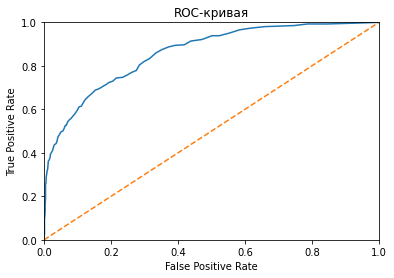

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Вывод: 
Была протестированная модель с лучшими показателями на валидационной выборке.  
Модель прошла тест, т.к. на новых данных выдала показатели как и на валидационной выборке.  

## Общий вывод:
1. **Загрузили и изучили данные:**
   * Заметили пропуски в столбце `Tenure`, заменили на медиану.
   * Удалили столбцы `RowNumber`, `CustomerId`, `Surname`, т.к. они не дают никакой информации для нашего исследования.
   * Методом OHE преобразовали столбцы `Geography`, `Gender`.
   * Стандартизировали столбцы `CreditScore`, `Age`, `Balance`, `EstimatedSalary`, `Tenure`. 
   
2. **После изучения данных сформировали три выборки для проведения исследований.**
   * X_train, y_train - Обучающаяя выборка (60%)
   * X_valoid, y_valid - Валидационная выборка (20%)
   * X_test, y_test - Тестовая выборка (20%)
   
3. **Так же изучили дисбаланс классов**
   * 0 - 7963  
     1 - 2037  
     Соотношение 4:1 (запомним для борьбы с дисбалансом)
     
4. **Исследование моделей**
   * Лучший показатель F1 Показала модель случайного леса: **0.57**  
   * Затем идем модель древа решений: **0.50**  
   * Худший показатель у логичстической регрессии: **0.30**. 
   * Даже с дисбалансом мы имеем высокий Accuracy от 0.78 до 0.86. 
   
5. **Проведены исследования после балансирования классов.**   
Были использованны 3 метода:
   1. Взвешивание классов
   2. Увеличение выборки
   3. Уменьшение выборки 

После балансирования классов разными методами была найдена лучшая модель Random Forest. С показателями:  
Число деревьев: 91  
Глубина древа: 50  
Лучшего баланса удалось добиться увеличением классов.   

F1 модели 0.60.   
AUC-ROC модели 0.85.  

6. **Тестирование лучшей модели.**  

Была протестированная модель с лучшими показателями на валидационной выборке.  
Модель прошла тест, т.к. на новых данных выдала показатели как и на валидационной выборке. 